# Fossil Fuel Equity Finder
## Background
This tool was developed by a Climate Corps Bay Area fellow for Alameda County's Office of Sustainability and is intentioned to assist non-technical staff members in performing a preliminary assesssment of individual stock equity investments in fossil fuel companies embedded in their institutional portfolios. If you are interested in examining mutual fund equity investments in fossil fuel companies, visit [fossilfreefunds.org](https://fossilfreefunds.org/).

## Scope
This tool has 3 parts. In Part 1, you will learn how to request and prepare data on your insitutional equity portfolio and data on potential carbon emissions affiliated with the top fossil fuel companies. The tool will then identify which fossil fuel companies you are invested in and show you how much money you have invested in them. In Part 2, you will acquire market capitalization data for your flagged companies and the tool will perform a fair share analysis to determine what portion of the companies' carbon reserves you are directly invested in. In Part 3, you will see all of the companies you are invested in via a scatterplot that will highlight certain companies for potential action.

## Time Requirement
We estimate it will take 5 hours to collect and prepare the data to run Part 1 of the tool, including time spent requesting the data and formatting the data to the specifications of the tool. Running the tool will take no more than 30 minutes once all of the data is complete. We estimate it will take anywhere from 1-4 hours to research and gather the market capitalization data to run Parts 2 and 3, depending on the number of identified fossil fuel companies you may be invested in.

## Folder Structure
You are currently in a Jupyter Notebook, a front end application designed to make it easy for users to analyze and produce insights from data. The actual tool, however, is a series of Python scripts and data files that operate behind the scenes to match data and perform the analysis. This requires you as a user to manually save .csv files in two different folders: `data/equity_data/` and `data/carbon_data/`. The tool will walk you through the specifications neccessary to name and format the files appropriately. When you gather market capitalization data for Parts 2 and 3, you will be updating data files in `data/financial_data/`.

Some other folders you will see in the tool are `example_data`, which contains example fake data files that are named and formatted correctly, `ffequity`, which contains the back end Python code that this Notebook utilizes, and other folders that you don't need to worry about including `img` and `tests`.



# Part I: Identifying Fossil Fuel Equity Investments
Welcome to the tool! If you've made it this far, you're probably interested in seeing how this process will work. In this section, you'll learn where to acquire the base data needed to perform the analysis and how to prepare it for the tool.

## Acquiring individual equity data
This tool examines fossil fuel investments in individual equity, or stocks that a investor holds in individual companies. This does not include stocks an investor holds in mutual or commingled funds. In order to acquire the individual equity data that is affiliated with the institution you are examining, first you'll want to find out which fund you want to examine. If you are a member of a County pension plan, you may be interested in examining the investment portfolio affiliated with your pension. If you are a member of a government defferred compensation program, you may be interested in examining the investments affiliated with different plan options.

Once you have identified what type of investment fund you want to examine, you will need to send a data request to the appropriate data manager of that fund. This may be a CIO office or a technical services department; in most cases, if you reach out to a general communications email address or phone number, the staff working there should be able to direct you to the right place. You will be asking for **individual equity positions** for a specific year. For example, a good reflection of how a fund was invested in 2017 would be a snapshot of their individual equity positions on December 31, 2017. **It is important that you receive both the names of the stocks AND the ending market value (dollar value) of the investments**.

## Acquiring carbon reserve data
Once you send a data request to your investment fund, you should then start to think about what types of fossil fuel investments you are interested in examining. For example, Fossil Free Indexes provides an annual data set called the  [Carbon Underground 200](http://fossilfreeindexes.com/research/the-carbon-underground/), which is a list of the top publically traded 100 coal and 100 oil and gas companies compiled based on their listed carbon reserves (converted to GtCO2e). There may be other free or paid data sets that you may be interested in that you can use in this tool.

## "Years of Data"
This tool performs an analysis linking stock investments in companies to their carbon reserves for a particular year. For example, if you have equity positions for 2017 AND carbon reserve data for 2017, then this tool will perform an analysis for you. If you have equity positions for 2016 and 2017 AND carbon reserve data for 2016 and 2017, this tool will perform an analysis for you for both years of data: you will have information on both 2016 and 2017. "Years of data" refers to the historical data you will be requesting, not the current year or how many years you've been using the tool.

### Year Mismatching
What if you aren't able to completely match each year of data? The tool can work with that! There are a few cases you can work around:

__Case 1: You have only one year of carbon data but multiple years of equity data.__
In this case, you can project out, or re-use, your one year of carbon data into the corresponding years you have equity data for. Understand that you are now building in an assumption that the top fossil fuel reserves are not changing from year to year, which is a fine assumption to make but lowers the accuracy of the analysis. For example, if you have equity data for 2014, 2015, and 2016, but only have carbon reserve data for 2016, you can manually create two new .csv carbon data files for 2014 and 2015 using the data values contained in 2016.

__Case 2: You have only one year of equity data but multiple years of carbon data.__
Unlike Case 1, this case is a bit less useful for us. The tool examines investment data with carbon data as a supplement, and investment data changes quite significantly from year to year. In this case, we would recommend only using the year of carbon data that matches the one year of equity data.

__Case 3: You have one year of equity data and one year of carbon data, but they're both for different years.__
In this case, you can still perform the analysis. Rename the carbon data year to match the equity data year, just make a note of what year the carbon data actually represents. This decreases the accuracy of the tool, but is not a deal breaker. Due to the way the tool was designed, it is important that even though the years are actually different, they are named as if they were the same year.


### The tool pauses here, please continue once you have acquired both equity and carbon data for as many years as you are interested in examining.

## Getting Started
Now that you have your data, let's begin!

A few housekeeping items:

First things first, let's make sure we start fresh. If you see a number inside the `In [ ]` in the below code cell, that means we need to reset the notebook. Go to the top bar, click on `Kernel` and click on `Restart & Clear Output`.

Great! Now we can get started. The following code cell containts a few import statements that will load in the packages for displaying tables and data visualizations in the notebook. It also contains a few general commands to the notebook on how to format these tables and visualizations. You can run a code cell in Jupyter notebooks by clicking on the cell, selecting `Cell` from the top bar, and clicking on `Run Cells`. If you're comfortable with keyboard shortcuts, you can click on the cell and press `CTRL-ENTER` to run the cell.

Go ahead and run the below cell now.

In [1]:
# numpy and pandas are fundamental data processing libraries for Python
import numpy as np
import pandas as pd

# this line tells the notebook to display all numbers with 2 floating decimal places and commas separating thousands
pd.options.display.float_format = '{:,.2f}'.format

# matplotlib is a data visualization library for Python
import matplotlib.pyplot as plt

# these lines tell the notebook to show you the visualizations within the notebook using the "Seaborn" style
# https://seaborn.pydata.org/
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = [12, 6]

# this line will let the notebook show you images
from IPython.display import Image

Great! If the cell worked correctly, you should see a number inside the `In [ ]` cell. If you restarted the notebook, that number should be `In[1]`.

## The Benchmark Object
Now we're going to create a "Benchmark" Python object, which will be responsible for interfacing between us and the data. In order to do so successfully, we need to edit the below code cell to include __all__ of the years we want to analyze. For example, if you have data files for 2014-2017, edit the below `years` variable to equal `["2014", "2015", "2016", "2017"]`. If you only have one year's worth of data for 2014, edit the below `years` variable to equal `["2014"]`. Please note that the formatting of the list in brackets on the right side of the `=` next to `years` is very important:
* Each year must be in YYYY format
* Each year must be enclosed between open and closed `"` 
* Each year must be separated by `,`
* Note the last year in the list is not followed by a `,`

When you are done modifying (or not if the years happen to align with what you have), run the cell.

In [2]:
# modify the years in this list to reflect the entirety of your data and run this cell to store the values
years = ["2012", "2013", "2014"] # edit this

Great! Run the below cell to create your Benchmark object!

In [3]:
# this cell creates a Benchmark object that will perform the visualizations inline
from ffequity.processors.benchmark import Benchmark
benchmark = Benchmark(years)

Now we can call on Benchmark to help us out throughout the remainder of the tool.

## Data Cleaning
The two data folders you will be loading your acquired data are as follows:
* `data/equity_data/` is the folder where you will be saving the data you acquired from the investment fund
* `data/carbon_data/` is the folder where you will be saving the data you acquired from a carbon accounting institution

You will be cleaning and saving these data files according to the following standards:

### carbon_data
For .csv files stored in `data/carbon_data/`, please format them with four columns as indicated below:
* __Company(Company)__ containing data with letters and numbers representing the names of fossil fuel companies
* __Coal(GtCO2)__ containing data with with numbers only representing the estimated carbon emissions associated with fossil fuel companies' listed coal reserves in gigatons
* __Oil(GtCO2)__ containing data with numbers only representing the estimated carbon emissions associated with fossil fuel companies' listed oil reserves in gigatons
* __Gas(GtCO2)__ containing data with numbers only representing the estimated carbon emissions associated with fossil fuel companies' listed natural gas reserves in gigatons

__IMPORTANT NOTE__: If a company has reserves in coal and oil and/or gas, please combine their reserves into one row. Do not include duplicate company names and try to consolidate data where possible.

__IMPORTANT NOTE__: When you are formatting your data values within each sheet, make sure that there are no spaces at the end of company names, as sneaky spaces at the end of a data value will break the tool!!!

Please keep each year's worth of carbon data in a separate .csv file and name them according to the following naming convention:
* `YYYYFilename.csv`
* Note: The only requirement for carbon_data filenames is to lead each name with a four digit prefix representing the year that the data file examines, not the year you acquired the data.

You can explore `exampledata/carbon_data/` to see how carbon reserve data files should be titled and formatted. We can also ask Benchmark to help us out by showing us what a properly formatted carbon reserve data file looks like. Go ahead and run the below cell.

In [4]:
# run this cell to have Benchmark show you how to format your carbon data files
# ignore the running numbers on the far left, the first column should be in your first column
benchmark.show_sample_tables("Carbon")

,Company(Company),Coal(GtCO2),Oil(GtCO2),Gas(GtCO2)
0,Best Coal,10.00,0.00,0.00
1,Some Gas,0.00,5.00,2.50
2,More Oil,0.00,10.00,2.50
3,Better Coal,20.00,0.00,0.00
4,Decent Coal,5.00,0.00,0.00


#### equity_data
For .csv files stored in the `equity_data` folder, please format them with two columns titled and data typed as follows:
* __Stocks__ containing data with letters and numbers representing the names of individual companies you are invested in
* __EndingMarketValue__ containing data with with numbers only representing the USD value of all shares held in each individual company

Please keep each year's worth of equity data in a separate .csv file and name them according to the following naming convention:
* `YYYYFilename.csv`
* Note: The only requirement for equity_data filenames is to lead each name with a four digit prefix representing the year that the data file examines, not the year you acquired the data.

You can explore `exampledata/equity_data/` to see how equity data files should be titled and formatted. We can also ask Benchmark to help us out by showing us what a properly formatted equity data file looks like. Go ahead and run the below cell.

In [5]:
# run this cell to have Benchmark show you how to format your carbon data files
benchmark.show_sample_tables("Equity")

,Stocks,EndingMarketValue
0,SM GAS CLASS A,"54,987,651.00"
1,MORE OIL,"13,654,977.00"
2,DCT COAL OPTIONS,"546,879,852.00"
3,BST COAL,"1,124,568.00"
4,CLOTHES R US,"1,549,865.00"


## CHECKPOINT
### Before you run the following cell, make sure you completed the following steps correctly.
1. Make sure all of your data is in properly formatted csv files with correct file names for:
    * `equity_data`
    * `carbon_data`
2. Make you have a data file in both folders __for each year__ you want to assess 
3. Make sure you have the latest version of Python and installed all of the third party libraries. Instructions can be found on the README.md file or on the github website.
    * fuzzywuzzy
    * mpld3
4. Make sure your computer isn't running too many other applications that might take away from the performance of the tool

### Great, let's run the analysis!
The below code cell will perform the analysis. It will generate statements below itself notifying you of the status of the tool and should take around 5-15 seconds for each year of data you have provided.

If there are any missing data pieces or errors in formatting, this cell should print out the corresponding error statement.

As with any Python program, if there is an error that has not been accounted for, and you see a weird Error output with no instruction, I highly recommend saving your data in another place, deleting the entire tool from your computer, and redownloading a fresh version from the github website. Turning it off and on again works wonders.

Go ahead and run the below cell.

In [6]:
# run this code cell to begin matching and assessing fossil fuel investments!
%run ./ffequity/ffequity.py

Folders Validated
All files validated within equity_data
All files validated within carbon_data
Files validated
All data validated within equity_data
All data validated within carbon_data
Data validated
2012 complete...
2013 complete...
2014 complete...


## Fossil Fuel Equity Exploration
Congratulations! You succesfully completed your share of Part 1 of this tool!

Now that the analysis is complete, you can view the outputs manually by going into the `data/assessment/` folder and opening up the .csv files that are stored there.

However, this is Benchmark's time to shine! We can ask Benchmark to perform a variety of functions that will give us high level insights into the results of our analysis.

First, let's ask Benchmark to tell us how many fossil fuel companies we were invested in per year. Go ahead and run the below cell.

In [7]:
# run this cell to have benchmark print out the number and names of fossil fuel companies you owned investments in
data = benchmark.get_equity_tables()
benchmark.company_names()

2012
You owned investments in 7 fossil fuel companies:
Cloud Peak Energy, ConocoPhillips, CONSOL Energy, ENI, Coal India, Royal Dutch Shell, SunCoke Energy

2013
You owned investments in 6 fossil fuel companies:
ConocoPhillips, CONSOL Energy, Foresight Energy, ENI, Coal India, Royal Dutch Shell

2014
You owned investments in 7 fossil fuel companies:
ConocoPhillips, CONSOL Energy, BP, Foresight Energy, ENI, Coal India, Royal Dutch Shell



Now that we have a sense of how many fossil fuel companies we are invested in, let's see how much money we've put into these companies. Run the below cell to have Benchmark show us aggregate investments, split out by fuel type.

In [8]:
#run this cell to see how much money was invested per year by fuel type
aggregateTable = benchmark.aggregate_equity_table()
aggregateTable

,Fossil Fuel Equity,Total Individual Equity,Coal Equity,Oil Equity,Gas Equity
Year,,,,,
2012,"74,142,802.00","2,607,380,240.00","27,185,509.00","25,802,252.83","21,155,040.17"
2013,"69,930,824.00","2,626,738,693.00","22,034,387.00","26,318,296.83","21,578,140.17"
2014,"84,950,971.00","2,667,326,914.00","21,747,938.00","37,923,096.67","25,279,936.33"


The above table shows the total number of dollars invested across all fossil fuel companies under `Fossil Fuel Equity`. It also breaks out fossil fuel investment dollars by the types of companies the are invested in; `Coal Equity` represents the total investment in coal companies, and the same is true for `Oil Equity` and `Gas Equity`. `Total Individual Equity` shows you the total dollars invested in all types of companies, not just fossil fuels.

Now that we've looked at the numbers, let's make some charts! You may zoom in and out of this notebook like you would any webpage, in case you'd like to make it larger. You may also save any of these output charts as image files by right clicking on the chart.

### Total Dollars Invested in Fossil Fuel Companies
Run the below code cell to tell Benchmark to show us the total amount of dollars invested in fossil fuel companies by year in the form of a bar chart.

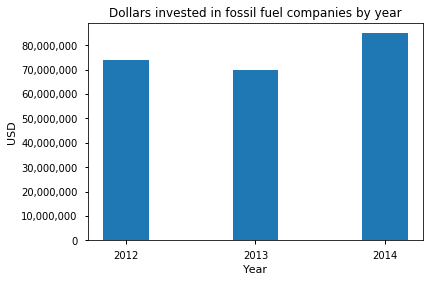

In [9]:
# run this cell to see the total amount of investments in fossil fuel companies
benchmark.plot_fossil_fuel_equity()

### Total Dollars Invested by Fuel Type
Run the below code cell to tell Benchmark to show us the previous bar chart, but segemented by fuel type. For example, the `Coal` color represents the amount of dollars invested in coal companies only.

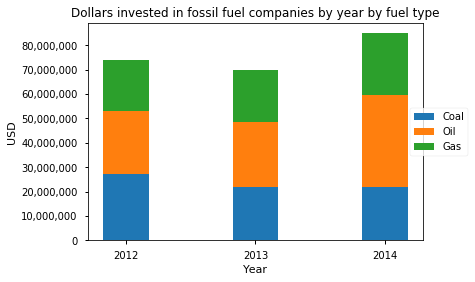

In [10]:
# # run this cell to see the total amount of investments in fossil fuel companies by fuel type
benchmark.plot_fossil_fuel_equity_fuel_types()

### The tool pauses here, please continue if you have additional time and interest in exploring the embedded greenhouse gas emissions associated with your investments in fossil fuel companies.

# Part 2: Allocating Carbon Reserves by Investment
Welcome to Part 2 of the tool! Now that we've explored the dollar amounts that are invested in fossil fuel companies, we can start to examine how these investments translate into contributions to climate change. There are many ways to assess the impact of fossil fuel investments, however this tool was designed to perform a fair-share analysis.

## Fair Share Analysis
A fair share analysis examines equity at face-value. Equity is a representation of a portion of ownership in a particular company. This ownership is most often affiliated with entitlement to profits, but it also extends to ownership of a portion of assets in a company. The example of fossil fuel extraction companies is interestingly enough a simple one: the assets in a fossil fuel extraction company are largely comprised of fossil fuels (coal, oil, natural gas).

We need to know three things in order to perform a fair share analysis: the total carbon reserves a company has listed, the number of dollars invested in that company, and the total market worth of that company. We have the first two, these were gathered and prepared in Part 1. However, we still need the total market worth of each company we want to examine.

The analysis itself follows this formula:

$$ IC_c = I_c * (C_c / M_c) $$
Where $IC_c$ is the carbon reserves of a company that the equity is invested in, $I_c$ is the dollar investment in the company, $C_c$ is the entirety of the listed carbon reserves of that company, and $M_c$ is the market capitalization of that company.

### financial_data
In Part 2, you will be researching market capitalization (or total worth of a company) values online and manually entering them into the data files that were saved by the tool in `data/financial_data/` from Part 1. The tool narrowed down the search for you as you will only be researching the market capitalization values for fossil fuel companies you have investments in. The data files in `data/financial_data/` should be formatted correctly and named per year. Your only formatting job is to ensure that you enter market capitalization values in units of Billions USD with appropriate decimal placement.

For reference: 1.5 Trillion dollars is equivalent to 1500 Billion dollars and 250 Million dollars is equivalent to .25 Billion dollars.

### Finding Market Cap Values Online
You can go to multiple websites to try and find the present day market cap value of your companies. Since historical market cap values are hard to find, it is alright to use present day market cap values of your companies This tool was built with the understanding that you may not have 1-4 hours to find all of the market cap values for your target fossil fuel companies. This tool will only match and assess fossil fuel equity for each company that has a Market Cap value in `financial_data` for a given year. 

For example, if you only had time to find market cap values for 10 of your target carbon companies, then the tool will only look for matches within those 10. All of the tables and visualiztions will be generated as long as you have equity in at least one of those 10 companies. If the tool does not find a match, it will not output any results.

This means that the more financial data you manually enter, the more accurate the output of the tool will be.

I've included images of where to find market capitalization values on two different websites below:

#### Yahoo Finance - Market Cap Circled In Red
<img src="img/yahoofinancebp.png" alt="Drawing" style="width: 750px;"/>

#### Google Finance - Market Cap Highlighted
<img src="img/googlefinancechevron.png" alt="Drawing" style="width: 750px;"/>

### Data Formatting
For .csv files stored in the `financial_data` folder, please make sure they are formatted with two columns titled and data typed as follows:
* __Company__ containing data with letters and numbers representing the names of fossil fuel companies. __These company names should exactly match the Company(Company) data values in your carbon_data files!__
* __MarketCap(B)__ containing data with with numbers only representing the market capitalization value of each company in billions of USD. If the company is valued in the millions or trillions, please convert to billions for this field.

Please keep each year's worth of equity data in a separate .csv file and make sure they are named according to the following naming convention:
* `YYYYFilename.csv`
* Note: The only requirement for financial_data filenames is to lead each name with a four digit prefix representing the year that the data file examines, not the year you acquired the data.

## Important!
Once you have completed your market cap research and saved the data in the files in `data/financial/` __DO NOT RE-RUN THE CELL WITH__ `%run ffequity/ffequity.py`__!__

Doing so will overwrite your hard-earned data files with versions with just names of companies and you will lose the data you entered. Just to be safe, I recommend saving completed versions of the files in another place, `data/raw_data/` is a good spot if you can't think of one.

## CHECKPOINT
1. Make sure all of your data is in properly formatted csv files with correct file names for:
    * `financial_data`
2. Make sure you haven't saved any changes to the outputs of Part 1, stored in `data/assessment/`.
3. Make sure your computer isn't running too many other applications that might take away from the performance of the tool.

Great! Go ahead and run the below code cell to perform the fair share analysis.

In [11]:
# run this cell to perform the fair share analysis
%run ./ffequity/fairshare.py

Folders Validated
All files validated within assessment
All files validated within financial_data
Files validated
All data validated within assessment
All data validated within financial_data
Data validated
Congratulations, the tool has completed the analysis!


C:\Users\jdunn\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


<Figure size 432x288 with 0 Axes>

## Fair Share Portion of Carbon Reserves Exploration
Congratulations! You've successfully completed Part 2 of the tool!

Now that the fair share analysis is complete, you can examine the outputs of the assessment in `data/benchmarks/`. We can also use Benchmark!

First, let's ask Benchmark to show us how many greenhouse gas emissions (in tCO2e) are embedded in the carbon reserves that are "owned" by investments in fossil fuel companies. Go ahead and run the below code cell.

In [12]:
# run this code cell to aggregate equity and reserves by fuel type by year
data = benchmark.get_tables()
aggregateTable = benchmark.aggregate_table()
aggregateTable

,Fossil Fuel Equity,Total Individual Equity,Coal Equity,Oil Equity,Gas Equity,Coal Reserves (tCO2),Oil Reserves (tCO2),Gas Reserves (tCO2),Total Reserves (tCO2)
Year,,,,,,,,,
2012,"74,142,802.00","2,607,380,240.00","27,185,509.00","25,802,252.83","21,155,040.17","12,583,695.19","576,474.14","404,355.15","13,564,524.47"
2013,"69,930,824.00","2,626,738,693.00","22,034,387.00","26,318,296.83","21,578,140.17","9,040,457.94","588,003.59","412,442.23","10,040,903.77"
2014,"84,950,971.00","2,667,326,914.00","21,747,938.00","37,923,096.67","25,279,936.33","7,631,766.58","890,669.62","510,517.16","9,032,953.36"


The above table is an extension from the previous aggregate table we saw in Part 1. In addition to examining dollars invested by fuel type, this table examines the total number of embedded emissions in carbon reserves by fuel type.

### Examining companies by largest investments and/or reserves
We can ask Benchmark to dive a little deeper and look at these investments and reserve holdings on a company by company basis. In order to do so, we need to tell Benchmark what exactly we're looking for and how much of it we want to see. The below code cell contains two variables that you can edit.

`chosen` will be the metric you are interested in. It will tell Benchmark how to sort the companies. You can sort companies by:
* `"EMV"` - the dollar value of the investment in the company
* `"COAL"` - the carbon dioxide emissions embedded in your fair-share of the company's coal reserves
* `"OIL"` - the carbon dioxide emissions embedded in your fair-share of the company's coal reserves
* `"GAS"` - the carbon dioxide emissions embedded in your fair-share of the company's coal reserves

Go ahead and change `chosen` to any of these four options. Remember to use all capital letters and to keep your selection enclosed in `""`.

`numberOfRows` will be the number of companies you want to limit Benchmark showing you. It can be any whole number, but defaults to 5.

When the tables display, ignore the numbers on the far left. They don't mean anything for our purposes. If you want to find the 3rd largest of something, it will show up in the 3rd row.

In [13]:
# you may edit these two variables as per the instructions above, or leave them as they are
chosen = "COAL" # edit this
numberOfRows = 5 # edit this

In [14]:
# run this code cell to examine investments at a company leve
benchmark.show_top(rows=numberOfRows, sort=chosen)

Top 5 sorted by Coal(tCO2) for 2012


,Company(Company),Coal(tCO2),Oil(tCO2),Gas(tCO2),EndingMarketValue
2,SunCoke Energy,"6,573,636.25",0.00,0.00,"5,258,909.00"
0,CONSOL Energy,"5,383,362.16",0.00,0.00,"9,959,220.00"
5,Cloud Peak Energy,"457,843.57",0.00,0.00,"4,959,972.00"
1,Coal India,"168,853.20",0.00,0.00,"7,007,408.00"
3,ENI,0.00,"50,622.01","50,622.01","3,594,163.00"


Top 5 sorted by Coal(tCO2) for 2013


,Company(Company),Coal(tCO2),Oil(tCO2),Gas(tCO2),EndingMarketValue
2,Foresight Energy,"4,728,427.00",0.00,0.00,"4,728,427.00"
0,CONSOL Energy,"4,118,271.89",0.00,0.00,"10,158,404.00"
1,Coal India,"193,759.05",0.00,0.00,"7,147,556.00"
3,ENI,0.00,"51,634.45","51,634.45","3,666,046.00"
4,ConocoPhillips,0.00,"351,122.72","175,561.36","14,220,470.00"


Top 5 sorted by Coal(tCO2) for 2014


,Company(Company),Coal(tCO2),Oil(tCO2),Gas(tCO2),EndingMarketValue
2,Foresight Energy,"4,666,957.00",0.00,0.00,"4,666,957.00"
0,CONSOL Energy,"2,709,822.70",0.00,0.00,"10,026,344.00"
1,Coal India,"254,986.88",0.00,0.00,"7,054,637.00"
3,BP,0.00,"310,310.10","103,436.70","15,929,252.00"
4,ENI,0.00,"50,963.20","50,963.20","3,618,387.00"


Now that we've looked at the numbers, let's make some charts! You may zoom in and out of this notebook like you would any webpage, in case you'd like to make it larger. You may also save any of these output charts as image files by right clicking on the chart.

### Total Held Carbon Reserves

Run the below cell to tell Benchmark to show us the emissions embedded in our fair-share of the carbon reserves for the fossil fuel companies we are invested in via a bar chart.

For comparison, 1,000,000 tonnes of CO2 is equal to the emissions of electricity usage in 100,000 United States households for one year and the amount of carbon absorbed by 800,000 acres of pine trees in one year. [More 1MT CO2e conversions](https://www.arb.ca.gov/cc/factsheets/1mmtconversion.pdf)

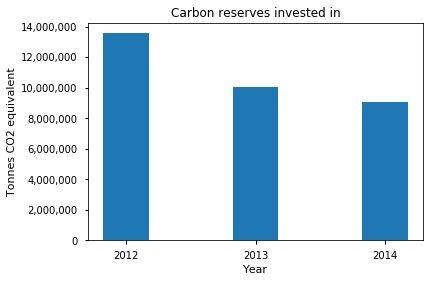

In [15]:
# run this cell to see the total amount of owned reserves from fossil fuel investments
benchmark.plot_reserves()

### Total Held Carbon Reserves by Fuel Type
Run the below cell to tell Benchmark to show us the emissions embedded in our fair-share of the carbon reserves for the fossil fuel companeis we are invested in, broken out by fuel type.

Do you note any differences in the distribution of emissions by fuel type compared to the distribution of invested dollars in the earlier table? You might see `Coal` comprising a larger breakdown of the carbon reserves than it's share of invested dollars; this is because coal is a much dirtier energy source than oil or natural gas.

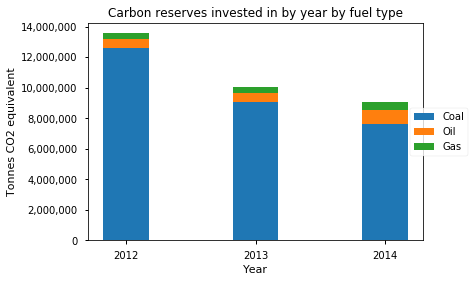

In [16]:
# run this cell to see the total amount of owned reserves from fossil fuel investments by fuel type
benchmark.plot_reserves_fuel_type()

### The tool pauses here, please continue if you have additional time and interest in exploring the distribution of companies by your portfolio's investment and owned reserves.

# Part 3: Identifying Opportunities for Action
This part is currently under development.